In [1]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

from data import generate_segp_dataset
from nn import Perceptron

torch.set_default_dtype(torch.float64)
plt.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 2

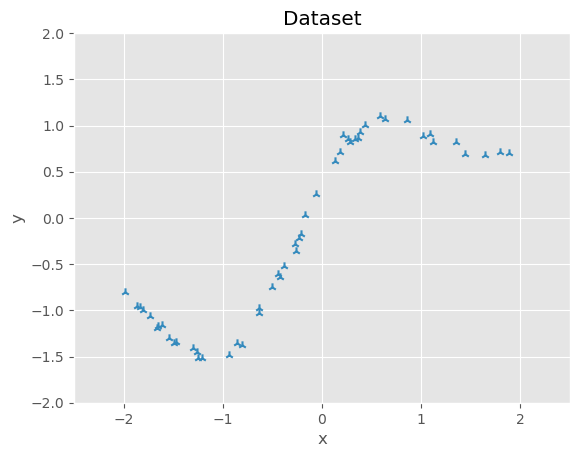

In [3]:
torch.manual_seed(3)
x, y = generate_segp_dataset(input_lower=-2.0, input_upper=2.0, num_points=50, noise_level=0.05, lengthscale=1.0)

plt.scatter(x, y, color='C1', marker='2')
plt.ylim([-2.0, 2.0])
plt.xlim([-2.5, 2.5])
plt.grid(True)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Choose a suitable stepsize

In [4]:
net = Perceptron(3, nonlinearity='relu', prior='Gaussian', bias=True)

In [14]:
granularity = 21
stepsizes = torch.logspace(-6, -2, granularity)
alphas = torch.zeros((granularity,))
for i, stepsize in tqdm(enumerate(stepsizes)):
    _, alpha = net.langevin_monte_carlo(x, y, simulation_steps=1000, step_size=stepsize, pbar=False)
    alphas[i] = alpha

0it [00:00, ?it/s]

/home/troch/dev/simple_nn/nn.py:200: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.sqrt(torch.tensor(step_size)) * torch.randn_like(params)
21it [00:51,  2.46s/it]


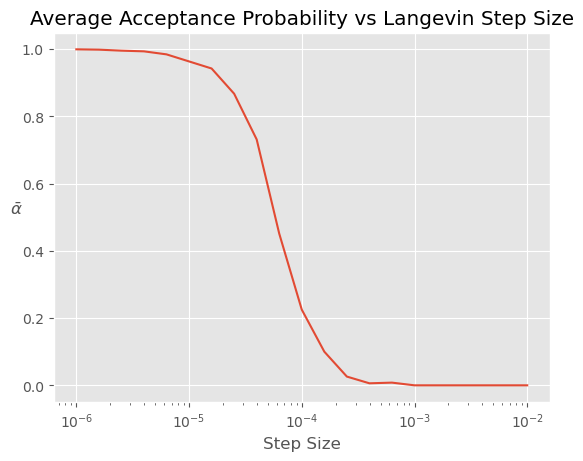

In [15]:
plt.plot(stepsizes, alphas)
plt.title('Average Acceptance Probability vs Langevin Step Size')
plt.xlabel('Step Size')
plt.ylabel(r'$\bar{\alpha}$', rotation=0)
plt.xscale('log')
plt.show()

### Evaluate convergence

In [28]:
net = Perceptron(3, nonlinearity='relu', prior='Gaussian', bias=True)
steps = 50000
posterior_samples, alpha = net.langevin_monte_carlo(x, y, simulation_steps=steps, step_size=5e-6)

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [02:16<00:00, 366.98it/s]


In [29]:
log_potentials = torch.zeros((steps,))
for i, sample in tqdm(enumerate(posterior_samples)):
    log_potentials[i] = net.get_log_potential(x, y, sample).detach()

50000it [00:20, 2418.59it/s]


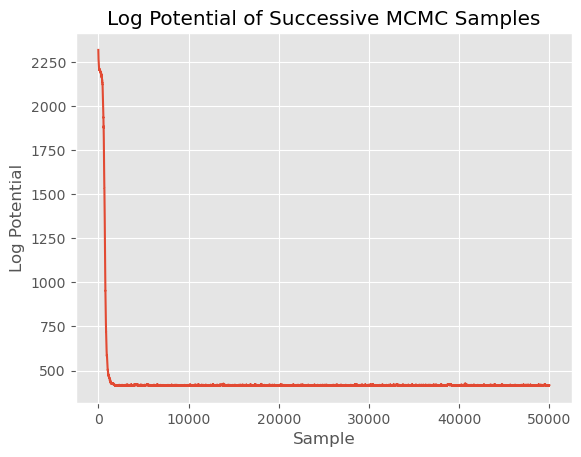

In [30]:
plt.plot(log_potentials)
plt.title('Log Potential of Successive MCMC Samples')
plt.xlabel('Sample')
plt.ylabel('Log Potential')
plt.show()

### Assess correlation between successive samples

In [ ]:
max_lag = 20
autocorrs = []
lags = [*range(max_lag)]
for lag in lags:
    pass
    # use home-brewed autocorrelation function here

In [ ]:
burn_in = 5000
